## Michele Catone | ID: 2130054

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats
import random
%matplotlib inline

### Exercise 1

Simulation of the coin tosses by creating an array with ones (Tail) and zeros (Head). We are interested in the probability of obtaining Head.

In [2]:
seed = random.seed(42)
rng = np.random.default_rng(seed)

N = 1000
a = rng.random(N)

a[a >= 0.3] = 1     #tail
a[a < 0.3] = 0      #head

coin = np.array(a)

#### 1.1 Uniform prior

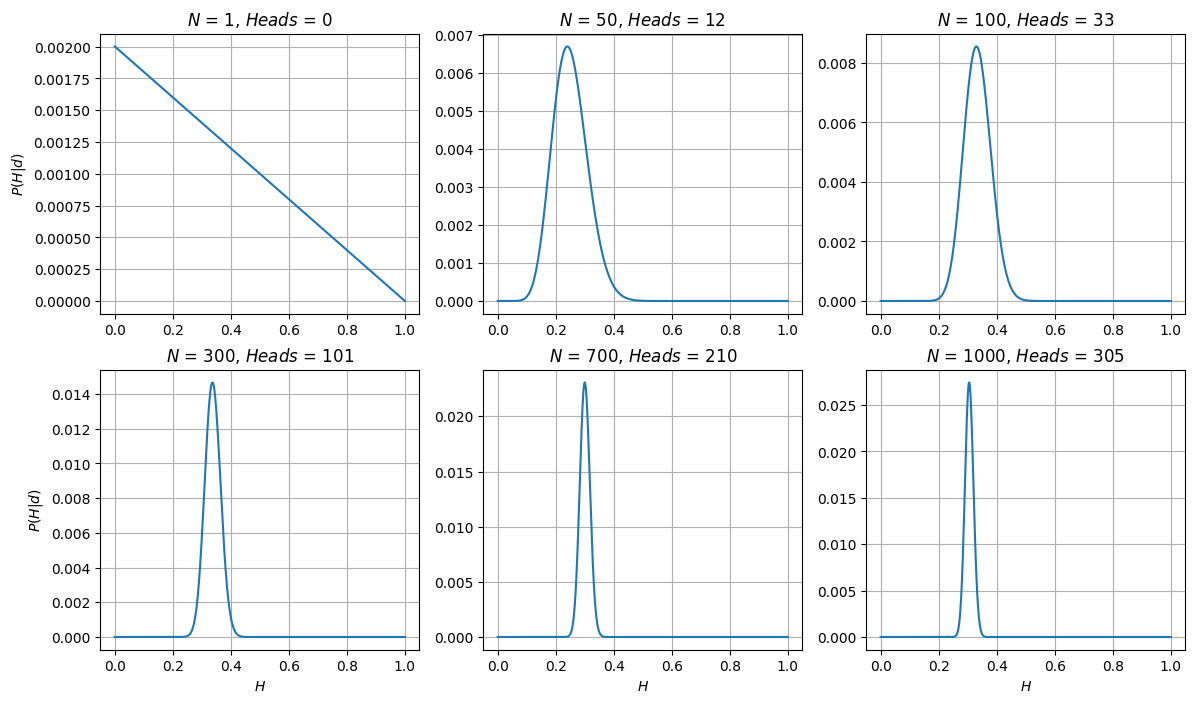

In [3]:
H = np.linspace(0, 1, 1000)
prior = np.ones(1000)
posterior = []

fig = plt.figure(figsize=(14, 8))
plot = 230

for i in range(1001):
    current_coin = coin[:i]
    R = len(current_coin[current_coin==0])
    like = H**(R)*(1-H)**(i - R)            #likelihood (Binomial distribution)
    post = like*prior                       #posterior
    post = post/np.trapz(post)              #normalization

    if i in [1, 50, 100, 300, 700, 1000]:
        plot += 1
        ax = fig.add_subplot(plot)
        ax.plot(H, post)
        if i in [1, 300]:
            ax.set_ylabel('$P(H|d)$')
        if i in [300, 700, 1000]:
            ax.set_xlabel('$H$')
        title = (f'$N$ = {i:.0f}, '
             f'$Heads$ = {R:.0f}')
        ax.set_title(title)
        ax.grid()
    
    posterior.append(post)

#### 1.2 Gaussian prior

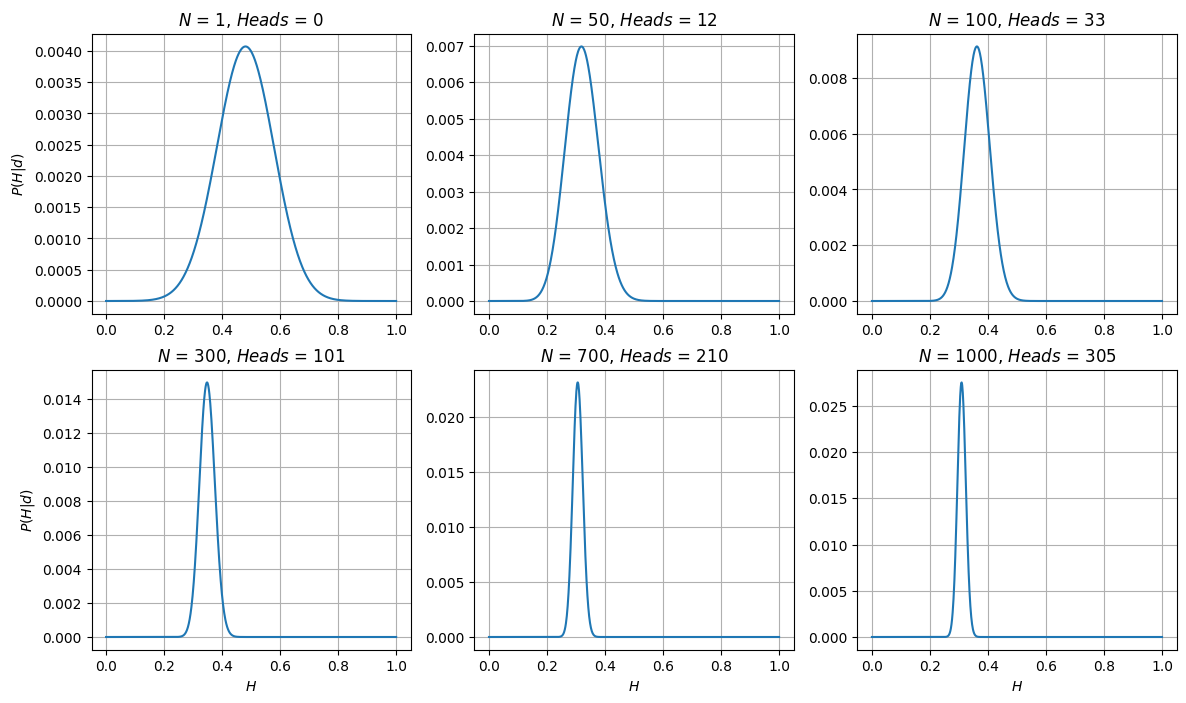

In [4]:
prior_g = scipy.stats.norm.pdf(H, 0.5, 0.1)
fig_g = plt.figure(figsize=(14, 8))
plot_g = 230
posterior_gauss = []

for i in range(1001):
    current_coin = coin[:i]
    R = len(current_coin[current_coin==0])
    like = H**(R)*(1-H)**(i - R)
    post_g = like*prior_g
    post_g = post_g/np.trapz(post_g)

    if i in [1, 50, 100, 300, 700, 1000]:
        plot_g += 1
        ax = fig_g.add_subplot(plot_g)
        ax.plot(H, post_g)
        if i in [1, 300]:
            ax.set_ylabel('$P(H|d)$')
        if i in [300, 700, 1000]:
            ax.set_xlabel('$H$')
        title = (f'$N$ = {i:.0f}, '
             f'$Heads$ = {R:.0f}')
        ax.set_title(title)
        ax.grid()

    posterior_gauss.append(post_g)

#### 1.3 Converged posteriors

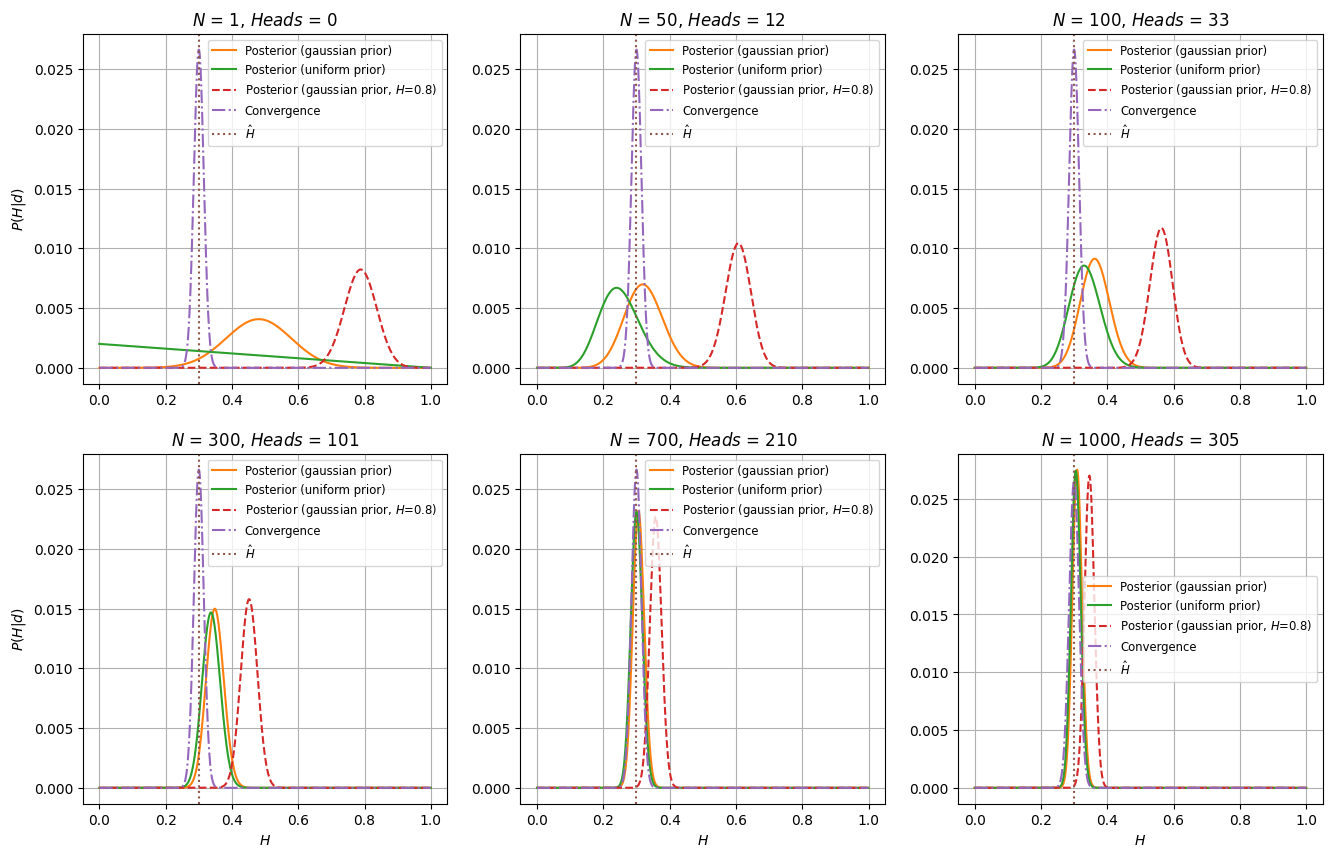

In [5]:
fig_comp = plt.figure(figsize=(16, 10))
plot_comp = 230
prior_g2 = scipy.stats.norm.pdf(H, 0.8, 0.05)
conv_post = scipy.stats.norm.pdf(H, 0.3, 0.015)
conv_post = conv_post/np.trapz(conv_post)

for i in [1, 50, 100, 300, 700, 1000]:
    current_coin = coin[:i]
    R = len(current_coin[current_coin==0])
    like = H**(R)*(1-H)**(i - R)
    post_g2 = like*prior_g2
    post_g2 = post_g2/np.trapz(post_g2)

    plot_comp += 1
    ax = fig_comp.add_subplot(plot_comp)
    ax.plot(H, posterior_gauss[i], label='Posterior (gaussian prior)', c='C1')
    ax.plot(H, posterior[i], label='Posterior (uniform prior)', c='C2')
    ax.plot(H, post_g2, ls='--', c='C3', label='Posterior (gaussian prior, $H$=0.8)')
    ax.plot(H, conv_post, ls='-.', c='C4', label='Convergence')
    ax.axvline(0.3, 0, 1, c='C5', label='$\\hat{H}$', ls=':')
    plt.legend(loc='best', fontsize='small')
    if i in [1, 300]:
            ax.set_ylabel('$P(H|d)$')
    if i in [300, 700, 1000]:
            ax.set_xlabel('$H$')
    title = (f'$N$ = {i:.0f}, '
             f'$Heads$ = {R:.0f}')
    ax.set_title(title)
    ax.grid()

Both posterior converge to a similar distribution in the end. This is due to the fact that, asymptotically, for high trials the likelihood dominates over the prior. The posterior with uniform prior is expected to converge faster than the gaussian one because it is an agnostic prior. In fact, for the gaussian prior, we first have to erase our belief of the coin to be fair. However, as we can be see from the plots, they converge in approximately the same amount of trials. This can be explained by the fact that the gaussian prior has a non-negligible overlap with the "real posterior" (purple dash-dotted line) centered in the true value $\hat{H}$. In fact, if we consider a posterior with a narrower gaussian prior which is centered in $H = 0.8$ (red dashed line), this would take a larger amount of trials to converge as it can be seen from the plots.

### Exercise 2

We can use Bayes theorem.

$P = \dfrac{\mathcal{L} \times \pi}{evidence}$

where

- $P$: posterior
- $\mathcal{L}$: likelihood
- $\pi$: prior

The evidence can be written by marginalizing as:

$P(A) = P(A, S) + P(A, \bar{S}) = P(A|S)P(S) + P(A|\bar{S})P(\bar{S})$ (same for $P(B)$),

where

- $A / S$: Mr. A tells the truth / $S$ is true
- $\bar{S}$: $S$ is false

In [ ]:
prior_A = 0.5
like_A = 4/5        #likelihood
evidence_A = like_A*prior_A + (1 - like_A)*(1 - prior_A)

post_A = (like_A*prior_A)/evidence_A
print('P(S|A) =', post_A)

P(S|A) = 0.8


Now the posterior of $S$ being true given that we trust Mr. A is the prior for Mr. B since our belief on S is changed after hearing Mr. A.

In [ ]:
like_B = 1/4    #likelihood
evidence_B = like_B*post_A + (1 - like_B)*(1 - post_A)

post_B = (like_B*post_A)/evidence_B
print('P(S|B) =', f'{post_B:.2f}')

P(S|B) = 0.57


### Exercise 3

$P(BB) = 0.01$: Prior (1%)

$P(\bar{T}|BB) = 0.05$ (False negative) $\rightarrow P(T|BB) = 0.95$, since $P(T|BB) + P(\bar{T}|BB) = 1$.

$P(T|\bar{BB}) = 0.05$ (False positive) 

where:

- $T/BB$: The test is positive / You are positive to BB
- $\bar{T}/\bar{BB}$: The test is negative / You are negative to BB

From Bayes theorem:

$P(BB|T) = \dfrac{P(T|BB)*P(BB)}{P(T)}$

where $P(T)$ is the evidence, which must take into account the false negative (FN)/positive (FP):

$P(T) = P(T, BB) + P(T, \bar{BB}) = P(T|BB)P(BB) + P(T|\bar{BB})P(\bar{BB})$

In [ ]:
prior_BB = 0.01
fn = 0.05           #false negative
fp = 0.05           #false positive
like_BB = 0.95      #likelihood
evidence_BB = (like_BB*prior_BB) + fp*(1 - prior_BB)

post_BB = (like_BB*prior_BB)/evidence_BB
print('P(BB|T) =', f'{post_BB:.2f}')


P(BB|T) = 0.16
